In [3]:
import seaborn as sns
import pandas_datareader as pdr
import pandas as pd
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt

# List of local stocks

In [ ]:
cedears = ['AAPL.BA', 'ABEV.BA', 'ABT.BA', 'AMD.BA', 'AMZN.BA', 'ARCO.BA', 'AUY.BA', 'AXP.BA', 'AZN.BA', 'BA.BA','BABA.BA', 'BBD.BA', 
          'BCS.BA','C.BA','CSCO.BA','CVX.BA','DESP.BA', 'DISN.BA','EBAY.BA','ERJ.BA','FB.BA','GE.BA','GGB.BA','GILD.BA', 'GLNT.BA'
          'GOLD.BA','GOOGL.BA', 'GSK.BA','HMY.BA','IBM.BA','INTC.BA','ITUB.BA','JNJ.BA','JPM.BA','KO.BA','MCD.BA','MELI.BA','MMM.BA',
          'MSFT.BA','NFLX.BA','NKE.BA','NVDA.BA','PBR.BA','PFE.BA','PG.BA','QCOM.BA','SNAP.BA','T.BA','TEN.BA','TRIP.BA','TSLA.BA','TWTR.BA',
          'V.BA','VALE.BA','WFC.BA','WMT.BA','X.BA','XOM.BA']

# List of S&P500 stocks

In [9]:
stocks = ['AAPL', 'ABEV', 'ABT', 'AMD', 'AMZN', 'ARCO', 'AUY', 'AXP', 'AZN', 'BA','BABA', 'BBD', 
          'BCS','C','CSCO','CVX','DESP', 'DIS','EBAY','ERJ','FB','GE','GGB','GILD', 'GLOB'
          'GOLD','GOOGL', 'GSK','HMY','IBM','INTC','ITUB','JNJ','JPM','KO','MCD','MELI','MMM',
          'MSFT','NFLX','NKE','NVDA','PBR','PFE','PG','QCOM','SNAP','T','TS','TRIP','TSLA','TWTR',
          'V','VALE','WFC','WMT','X','XOM']

#### Period of time for which we'll calculate

In [8]:
start = dt.datetime(2018,1,1)
start = start.strftime('%Y-%m-%d')

In [11]:
def get_data(stock):
    info = pdr.get_data_yahoo(stock, start=str(start))
    return info

In [12]:
def work_data(stock):
    worked_data = stock.loc[:,'Adj Close'].pct_change().dropna()
    worked_data = pd.DataFrame(worked_data)
    worked_data.rename(columns={'Adj Close': 'rets'}, inplace=True)
    return worked_data

In [13]:
def process_data(stock):
    variable = get_data(str(stock))
    variable = work_data(variable)
    return variable

In [14]:
aapl = process_data('aapl')
abev = process_data('abev')
abt = process_data('abt')
amd = process_data('amd')
amzn = process_data('amzn')

In [15]:
aapl

,rets
Date,
2018-01-03,-0.000174
2018-01-04,0.004645
2018-01-05,0.011385
2018-01-08,-0.003714
2018-01-09,-0.000115
...,...
2020-07-23,-0.045516
2020-07-24,-0.002477
2020-07-27,0.023700


# Create correlation matrix

In [18]:
corrs_2018 = np.corrcoef([aapl['rets'],abev['rets'],abt['rets'],amd['rets'],amzn['rets']])

In [19]:
corrs_2018

array([[1.        , 0.35077518, 0.64651396, 0.51981025, 0.64267881],
       [0.35077518, 1.        , 0.29023484, 0.25635654, 0.250433  ],
       [0.64651396, 0.29023484, 1.        , 0.45757251, 0.51703848],
       [0.51981025, 0.25635654, 0.45757251, 1.        , 0.53911321],
       [0.64267881, 0.250433  , 0.51703848, 0.53911321, 1.        ]])

In [20]:
legend_2018=['AAPL', 'ABEV', 'ABT', 'AMD', 'AMZN']

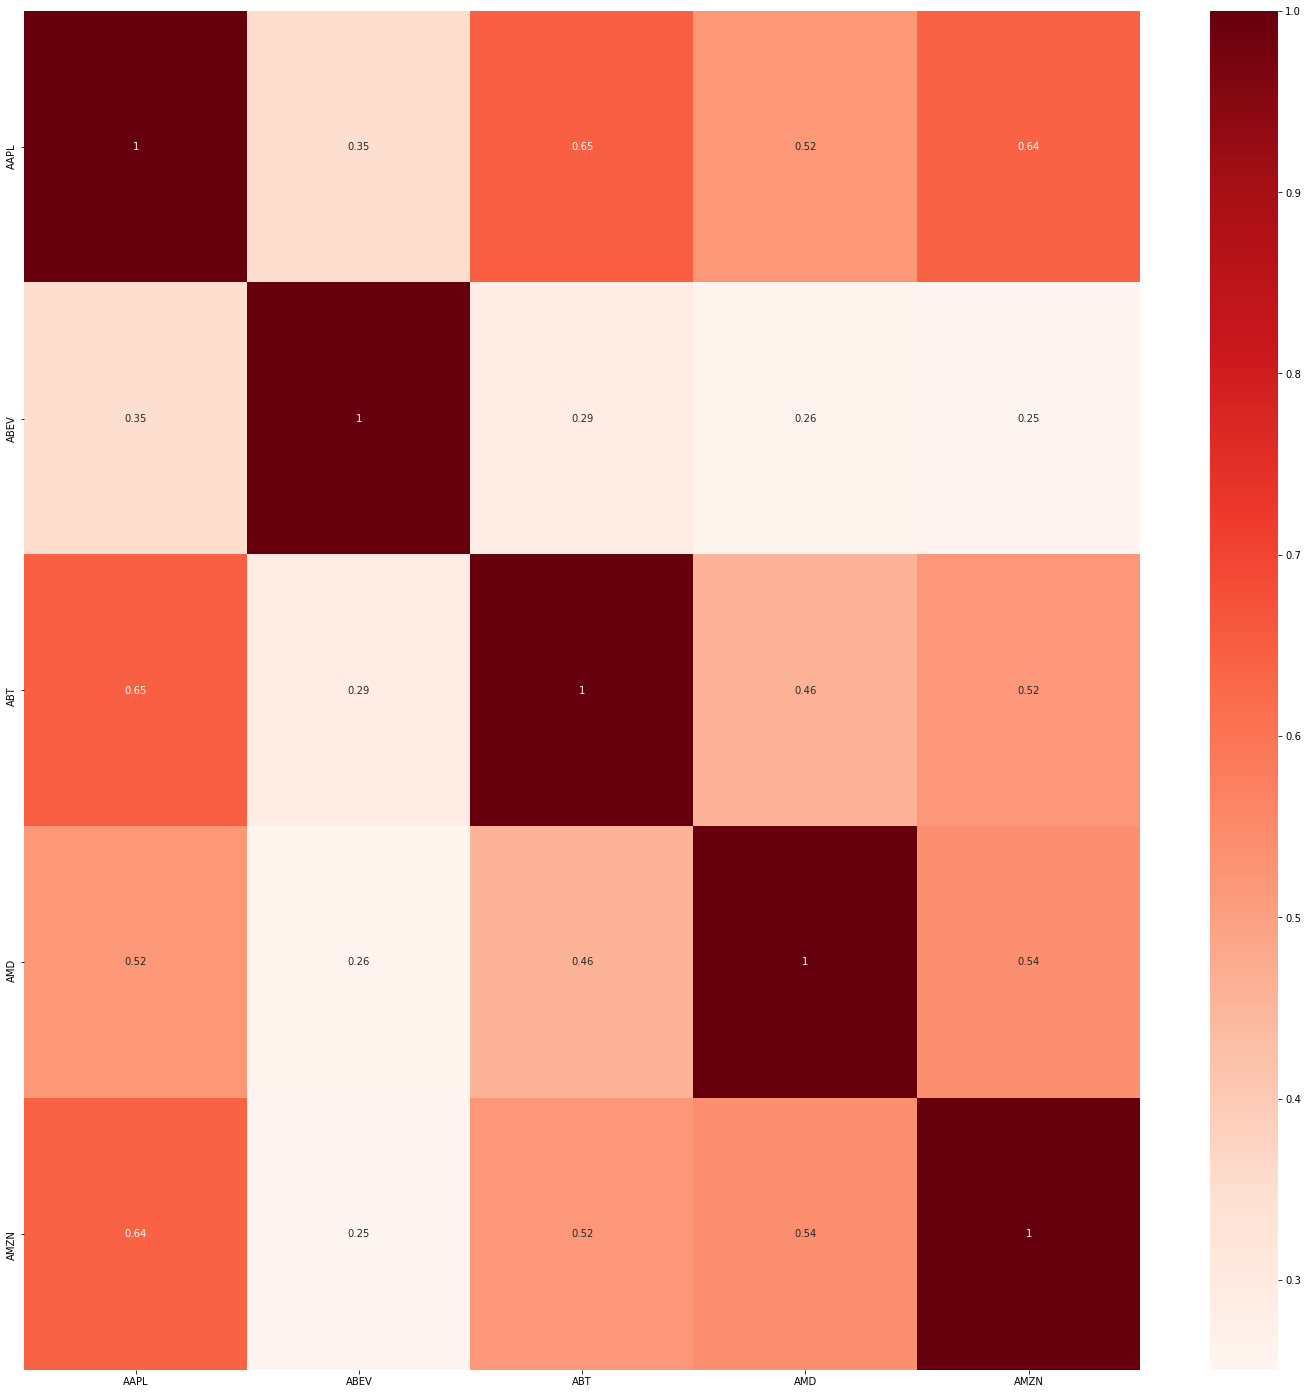

In [23]:
fig2018 = plt.figure(figsize=(25,25))
ax2018 = fig2018.subplots()
sns.heatmap(corrs_2018,xticklabels=legend_2018, yticklabels=legend_2018, annot=True,cmap='Reds')
plt.savefig("corrs_2018.png")
plt.show()
plt.close('all')